In [3]:
!pip install rembg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 5.4 MB/s eta 0:00:00


In [4]:
!pip install onnxruntime-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.5/300.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.3 MB/s eta 0:00:00


In [9]:
import cv2
import numpy as np
from rembg import remove
from PIL import Image, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt

In [6]:
def process_step_by_step():
    bg = Image.open('background.jpg').convert("RGBA")
    fg = Image.open('teman.jpg').convert("RGBA")

    fg_no_bg = remove(fg)

    print("3️⃣ Mengatur Geometri & Posisi...")
    bg_w, bg_h = bg.size
    fg_w, fg_h = fg_no_bg.size

    scale_ratio = 0.95
    target_height = int(bg_h * scale_ratio)

    aspect_ratio = fg_w / fg_h
    target_width = int(target_height * aspect_ratio)

    fg_resized = fg_no_bg.resize((target_width, target_height), Image.Resampling.LANCZOS)

    center_bg = bg_w // 2
    pos_x = center_bg - target_width + 80

    pos_y = bg_h - target_height

    enhancer = ImageEnhance.Brightness(fg_resized)
    fg_final_obj = enhancer.enhance(0.95) # Gelapkan dikit

    enhancer_col = ImageEnhance.Color(fg_final_obj)
    fg_final_obj = enhancer_col.enhance(0.9) # Kurangi saturasi dikit

    final_result = bg.copy()
    final_result.paste(fg_final_obj, (pos_x, pos_y), fg_final_obj)

    return bg, fg, fg_no_bg, final_result

✅ Fungsi siap digunakan! Jalankan Cell berikutnya untuk melihat hasil.


1️⃣ Memuat gambar...
2️⃣ Melakukan Image Matting (AI)...
3️⃣ Mengatur Geometri & Posisi...
4️⃣ Menggabungkan Layer...


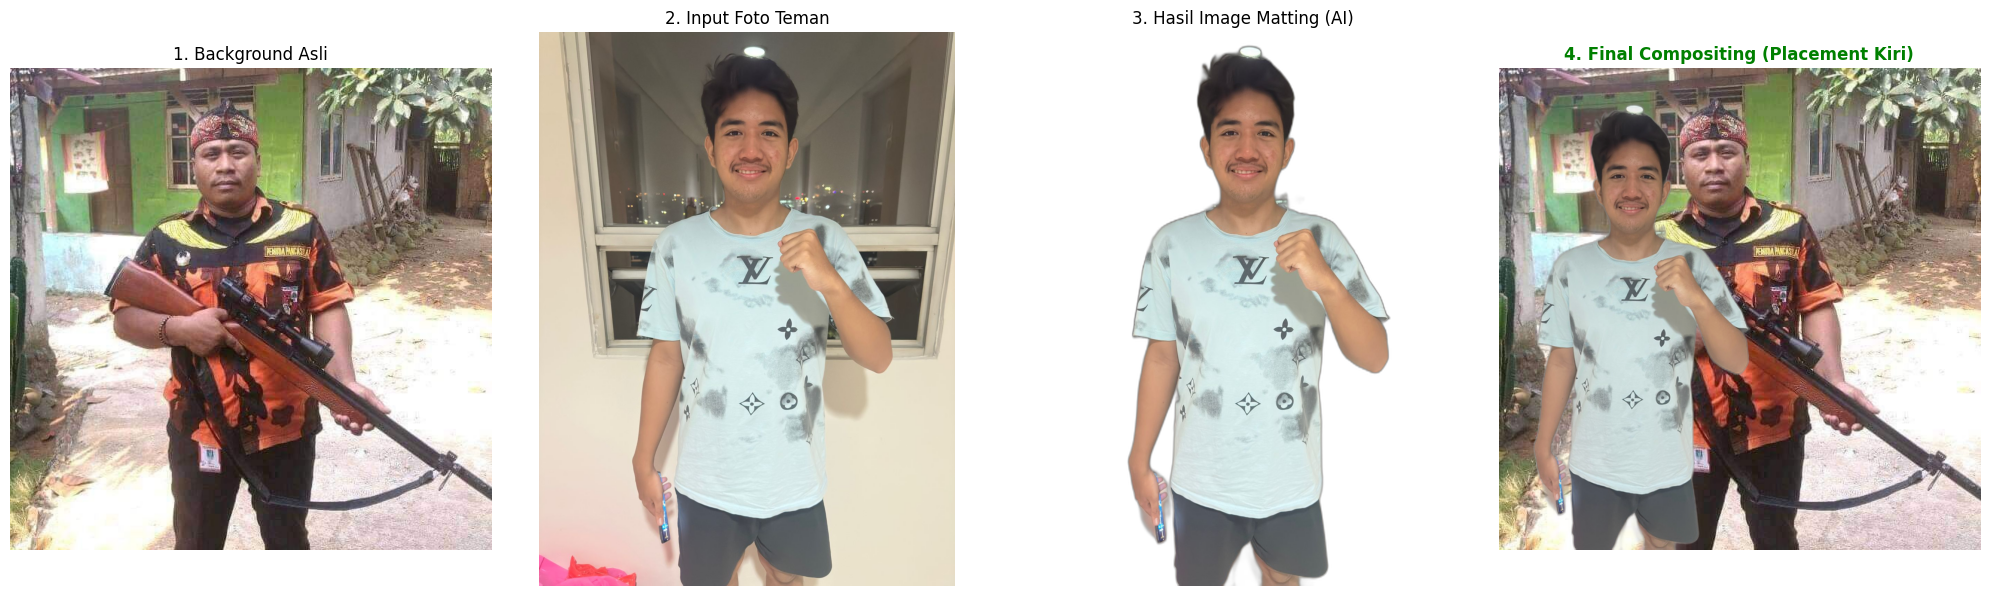


🎉 Gambar berhasil diproses! Lihat tahapan di atas.
File tersimpan sebagai 'tugas_cpmk4_final.jpg'


In [10]:
img_original, img_teman_asli, img_masking, img_hasil = process_step_by_step()

img_hasil.convert("RGB").save('tugas_cpmk4_final.jpg')

fig, axes = plt.subplots(1, 4, figsize=(20, 6))

axes[0].imshow(img_original)
axes[0].set_title("1. Background Asli", fontsize=12)
axes[0].axis('off')

axes[1].imshow(img_teman_asli)
axes[1].set_title("2. Input Foto Teman", fontsize=12)
axes[1].axis('off')

axes[2].imshow(img_masking)
axes[2].set_title("3. Hasil Image Matting (AI)", fontsize=12)
axes[2].axis('off')

axes[3].imshow(img_hasil)
axes[3].set_title("4. Final Compositing (Placement Kiri)", fontsize=12, color='green', fontweight='bold')
axes[3].axis('off')

plt.tight_layout()
plt.show()